In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import check_lab05 as p

plt.rcParams.update({'font.size': 14})
plt.rcParams['lines.linewidth'] = 3
pi=np.pi

ME 3264 - Applied Measurements Laboratory
===========================================

Lab #5 - Linear Variable Differential Transformer(LVDT)
=====================================================

## Objective
The objectives of this laboratory are :

1. Gain familiarity with the physical operating principle of Linear Variable Differential Transformer (LVDT) measurements
2. Calibrate the LVDT measurement using voltage measurements
3. Determine relationship between supplied voltage amplitude and linear motion
4. Investigate effects of changing input frequency and sampling rate on response frequency 


## Background


### Working principle of LVDT

A linear variable differential transformer (LVDT) is a device that can measure the absolute linear position or changes in position of a separate device. LVDTs operate on the principle of a transformer. Because it is a transformer, the LVDT requires an ac drive signal. As shown in Fig.1 (and Fig.2A) , an LVDT consists of a coil assembly and a core. The coil assembly is typically mounted to a stationary form, while the core is secured to the object whose position is being measured. The coil assembly consists of three coils of wire wound on the hollow form. A core of permeable material can slide freely through the center of the form. The inner coil is the primary, which is excited by an AC source as shown. Magnetic flux produced by the primary is coupled to the two secondary coils, inducing an AC voltage in each coil [2].

<center><img src="https://upload.wikimedia.org/wikipedia/commons/5/57/LVDT.png" alt="Drawing" style="width: 300px;"/> </center>

<center>Figure 1:  Cutaway view of an LVDT. Current is driven through the primary coil at A, causing an induction current to be generated through the secondary coils at B. [4]  </center>

### LVDT Measurement

An LVDT measures displacement by associating a specific signal value for any given position of the core. This association of a signal value to a position occurs through electromagnetic coupling of an AC excitation signal on the primary winding to the core and back to the secondary windings as shown in Fig.2B. The position of the core determines how tightly the signal of the primary coil is coupled to each of the secondary coils. The two secondary coils are series-opposed, which means wound in series but in opposite directions. This results in the two signals on each secondary being 180 deg out of phase. Therefore phase of the output signal determines direction and its amplitude, distance [2].

Fig.2C shows the operational characteristics of LVDT with respect to the core displacement. 

<center><img src="https://ars.els-cdn.com/content/image/3-s2.0-B9780081028841000042-f04-12-9780081028841.jpg" alt="Drawing" style="width: 200px;"/> </center>

<center>Figure 2:  The operation of the LVDT (A) Internal arrangement (B) Electrical circuit, the dots signify the positive ending of the winding (C) Operational characteristics [5]  </center>

### Advantages of LVDT

LVDTs have a number of advantages, including -

* The ability to measure absolute position, the ability to be completely sealed from the environment, nearly frictionless operation, and excellent repeatability of the measurement
* Because the device relies on the coupling of magnetic flux, an LVDT can have infinite resolution. Therefore the smallest fraction of movement can be detected by suitable signal conditioning hardware, and the resolution of the transducer is solely determined by the resolution of the data acquisition system
* Linearity of operation as output is a direct and linear function of the input





## Part 1 - LVDT calibaration

### Problem 1 - Relate voltage to displacement

Let's consider a LVDT with it's core attached to a micrometer. Following table consists of core displacment, and mean DC voltage, recorded by DAQ in an experiment. Obtain the caliberation curve of LVDT using linear regression. 


|Displacement| Mean DC |
|---         | ---     | 
|5 mm        | 4.829 V | 
|6 mm        | 6.690 V | 
|7 mm        | 8.333 V | 
|4 mm        | 3.868 V | 
|3 mm        | 2.024 V | 
|2 mm        | 0.145 V | 
|1 mm        | -1.738 V | 




Caliberation equation for LVDT is y = -3.163 +1.647x 
 
Caliberation coefficent a =-3.163 +/- 0.185 

Caliberation coefficent b = 1.647 +/- 0.041 



Text(0, 0.5, 'Mean DC, Volts')

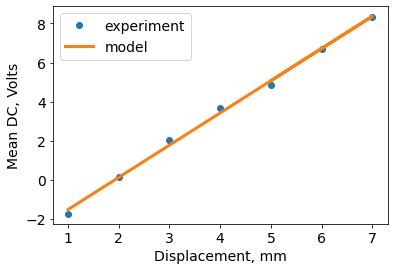

In [16]:
from scipy.optimize import curve_fit


def func(x,a,b):
    '''fits the linear equation y = a + bx
    This equation can be replaced by polynomial or exponential 
    as per the fitting goals of the problem'''
    return (a + b*x)

x = [5,6,7,4,3,2,1]   # mm
y = [4.829,6.690,8.333,3.686,2.024,0.145,-1.738]   # Volt

k,pcov=curve_fit(func, x, y) 
k_error=np.sqrt(np.diag(pcov))  # Co-variance matrix
a =  np.asarray(k[0])
b =  np.asarray(k[1])

print("Caliberation equation for LVDT is y = %1.3f +%1.3fx \n "%(a,b))
print("Caliberation coefficent a =%1.3f +/- %1.3f \n"%(k[0],k_error[0]))
print("Caliberation coefficent b = %1.3f +/- %1.3f \n"%(k[1],k_error[1]))


plt.plot(x,y,'o',label='experiment')
plt.plot(x,func(x,a,b),label='model')
plt.legend()
plt.xlabel(r'Displacement, mm')
plt.ylabel('Mean DC, Volts')

Note - In the curvefit,

`k,pcov=curve_fit(func, x, y)`

* `k` - Optimal values for the parameters so that the sum of the squared residuals of (f(x,k) - y) is minimized.
* `pcov` - The estimated covariance of k. The diagonals provide the variance of the parameter estimate. To compute one standard deviation errors on the parameters, we use k_error = np.sqrt(np.diag(pcov)).

### Problem 2 - Check your work

Calculate the linear regression coefficents a and b, and their standard variances for data in problem 1 using  linear least square fitting method described in [Ref 3](https://mathworld.wolfram.com/LeastSquaresFitting.html). Does these values compare well with the coefficents and standard variance values obtained from covarianc matrix in the above example?

In [3]:
## # enter your work here - Uncomment the following lines of code and make necessary changes

# n = len(x)

# # sum of squares

# x_mean = np.mean(x)
# y_mean = 
# ss_xx = np.sum((x-x_mean)**2)
# ss_yy = 
# ss_xy = np.sum((y-y_mean)*(x-x_mean))

# # linear regression coefficients
# b = ss_xy/ss_xx
# a = y_mean - b*x_mean
# print("Equation for linear egression line is y = %1.3f +%1.3fx \n "%(a,b))

# # correlation coefficient,
# r2 = ss_xy**2/ss_xx/ss_yy
# print("Correlation coefficient, is y = %1.3f \n "%(r2))

# # The standard errors for a and b 
# s = (ss_yy -ss_xy**2/ss_xx)/(n-2)

# sigma_a = np.sqrt(s)*np.sqrt(1/n + (x_mean**2/ss_xx))
# sigma_b = np.sqrt(s)/np.sqrt(ss_xx)

# print("Std (a)= %1.3f\n "%sigma_a)
# print("Std (b)= %1.3f\n "%sigma_b)

p.check_p02(a, b)

Nice work!


2

## Part 2 - Calibrate Piezoelectric with LVDT output

In part 2, you compare the amplitude of input voltage for the piezoelectric motion to the amplitude of LVDT voltage output. When the output voltage is larger, the piezoelectric is moving further. 



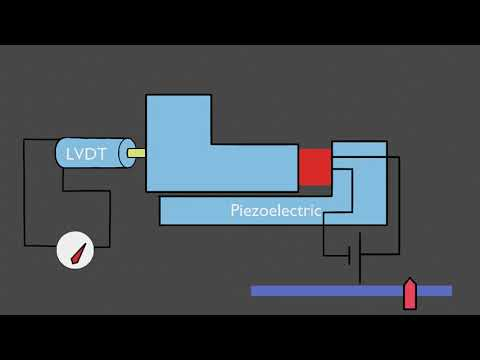

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('NwE8B9IHvyo')

### Problem 3 - Calibrate Piezoelectric

Following table consists of amplitude of input voltage for the piezoelectric motion, and LVDT voltage output, recorded by DAQ in an experiment. Obtain the caliberation curve using linear regression. You can use `curve_fit` as expalined in Part 1. 

|Input, Vpp  | Output Vpp |
|---         | ---        | 
|1           | 0.00101    | 
|2           | 0.00380    | 
|4           | 0.00698   | 
|4           | 0.01048    | 
|5           | 0.01420    | 
|6           | 0.01832    | 
|7           | 0.02273   | 


In [ ]:
## enter your work here

## Part 3 - Explore frequency-response between Piezoelectric and LVDT

In part 3, you vary the frequency input to the piezoelectric and measure the frequency output measured by the LVDT. You are constrained by the Nyquist frequency in these measurements. If you collect data at 500 Hz, then the largest frequency you can reliably measure is 250 Hz. The concept of Nyquist frequency if further explored with Problem 4. 


### Problem 4 - Nyquist frequency

Consider a case where signal generator sends a signal of the form of cos-wave to a piezo motor. The signal has frequency of  1-Hz  with amplitude of 2 Vpp (Volts peak-to-peak) . The Data Aquisition System (DAQ) takes N measurements over the given timeframe from 0-10 seconds to measure the corresponding LVDT output signal. Plot and compare the input and measured signals. 

Text(0, 0.5, 'a.u.')

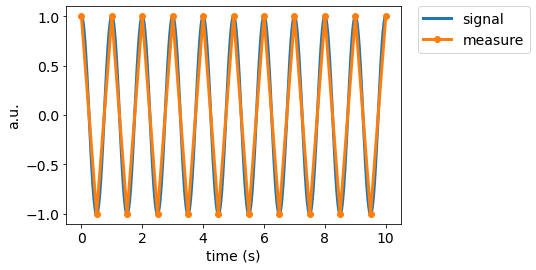

In [17]:
N=20
t_collect=10 # time to collect data
t=np.linspace(0,t_collect,1000)
y=np.cos(2*pi*t)
tsample=np.linspace(0,10,N+1)
ysample=np.cos(2*pi*tsample)
plt.figure(20)
plt.plot(t,y,label='signal')
plt.plot(tsample,ysample,'o-',label='measure')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('time (s)')
plt.ylabel('a.u.')

For N=20, it would appear that DAQ can capture a minimal example of input signal (just the peaks occuring at 1 Hz). Collecting data for N=20 over 10 seconds is equivalent to sampling at 20 samples/10 seconds = 2 Hz. This is called the Nyquist rate which is given as such

$f_{Nyquist}=2f_{signal}$. (1)

In Equation 1, the Nyquist rate (also Shannon Sampling) [\[6\]](https://github.uconn.edu/rcc02007/ME3264-Lab_03)[\[7\]](./jerri_1977-shannon_sampling.pdf)[\[8\]](./nyquist.pdf), $f_{Nyquist}$, is the minimum sampling rate necessary to capture the signal at frequency, $f_{signal}$. Try changing N<20 and consider the apparent signal frequencies. 

If you try N=11 in the Python code below, you will see a phenomenon called "aliasing" or the "wagon-wheel effect" [\[9\]](http://www.onmyphd.com/?p=aliasing). When you look at the measured signal, it appears to have a frequency of 1 cycle/10 seconds = 0.1 Hz. This phenomenon is called the wagon-wheel effect because it is noticeable when recording spinning objects like a wagon wheel [or turbine](https://www.youtube.com/watch?v=vIsS4TP73AU). The wheel spins at a given frequency and the camera records at another frequency. When the ratio of the wheel frequency to camera recording frequency reaches certain values the wheel appears to stop, spin slower, or even backwards. [\[6\]](https://github.uconn.edu/rcc02007/ME3264-Lab_03)

Experimentally, we avoid aliasing by sampling above the Nyquist rate from equation 1.

Text(0, 0.5, 'a.u.')

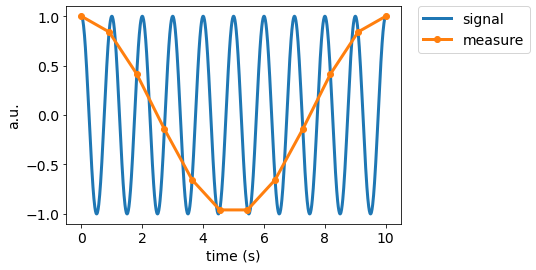

In [18]:
N=11
t_collect=10 # time to collect data
t=np.linspace(0,t_collect,1000)
y=np.cos(2*pi*t)
tsample=np.linspace(0,10,N+1)
ysample=np.cos(2*pi*tsample)
plt.figure(20)
plt.plot(t,y,label='signal')
plt.plot(tsample,ysample,'o-',label='measure')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('time (s)')
plt.ylabel('a.u.')

## Procedure 

The procedure and details of the experiment are included in a lab-handout [1].

[ME3264_Lab_5_LVDT.pdf](https://drive.google.com/file/d/1FbykzotAE50SRTujNUjvF9vek97TlJXL/view?usp=sharing)


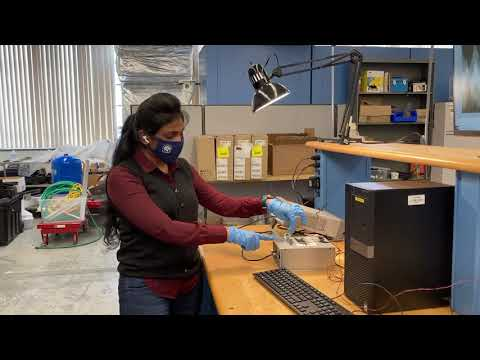

In [19]:
YouTubeVideo('FRWgpFApITo')

## Notes on error propagation and uncertainties




## References 

1. [ME3264_Lab_5_LVDT.pdf](https://drive.google.com/file/d/1FbykzotAE50SRTujNUjvF9vek97TlJXL/view?usp=sharing)
2. [Measuring Position and Displacement with LVDTs](https://www.ni.com/en-us/innovations/white-papers/06/measuring-position-and-displacement-with-lvdts.html)
3. [Least Squares Fitting](https://mathworld.wolfram.com/LeastSquaresFitting.html)
4. [Linear variable differential transformer, From Wikipedia](https://en.wikipedia.org/wiki/Linear_variable_differential_transformer)
5. [Velocity and position transducers, Richard Crowder, in Electric Drives and Electromechanical Systems (Second Edition), 2020](https://www.sciencedirect.com/science/article/pii/B9780081028841000042)
6. [ME3263-Lab_03, Prof. Ryan Cooper](https://github.uconn.edu/rcc02007/ME3264-Lab_03)
